In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Data4good\p2-arbres-fr.csv', sep =";", encoding = "utf-8")
df.drop('id', axis = 1, inplace= True)
df.drop("complement_addresse",axis =1, inplace = True)
df.drop("numero",axis =1, inplace = True)
df.drop("id_emplacement",axis =1, inplace = True)
df.drop("genre",axis =1, inplace = True)
df.drop("variete",axis =1, inplace = True)
df.drop("remarquable",axis =1, inplace = True)
df.drop("type_emplacement",axis =1, inplace = True)
print("Numéro d'arbres: ",len(df))


Numéro d'arbres:  200137


In [5]:
df.drop(df.index[(df["circonference_cm"] == 0)], axis = 0, inplace=True)
df.drop(df.index[(df["hauteur_m"] == 0)], axis = 0, inplace=True)
df.drop(df.index[(df["circonference_cm"] > 470)], axis = 0, inplace=True)
df.drop(df.index[(df["hauteur_m"] > 35 )], axis = 0, inplace=True)
df.dropna(subset=["circonference_cm"],inplace=True)
df.dropna(subset=["hauteur_m"],inplace=True)

print("Numéro d'arbres: ",len(df))

Numéro d'arbres:  159899


In [6]:
df["hauteur_m"] = 100 * df["hauteur_m"]

In [7]:
new_df = df.rename(columns={"hauteur_m":"hauteur_cm"})

new_df

,domanialite,arrondissement,lieu,libelle_francais,espece,circonference_cm,hauteur_cm,stade_developpement,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,hippocastanum,20,500,NaN,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata,65,800,A,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,baccata,90,1000,A,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,negundo,60,800,A,48.857722,2.321006
7,Jardin,PARIS 16E ARRDT,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,Platane,x hispanica,260,1700,NaN,48.876722,2.280222
...,...,...,...,...,...,...,...,...,...,...
198874,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,cerris,20,500,NaN,48.848074,2.409116
198875,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,cerris,20,500,NaN,48.848226,2.409147
198876,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,cerris,20,500,NaN,48.848379,2.409179
198877,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,cerris,20,500,NaN,48.848533,2.409209


In [8]:
df.dropna(subset=["stade_developpement"], inplace = True)
print("Numéro d'arbres: ",len(df))


Numéro d'arbres:  129996


<AxesSubplot:>

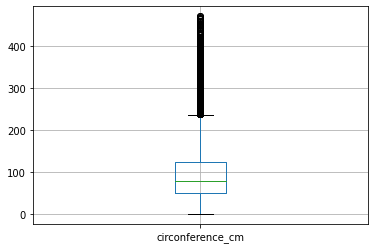

In [9]:
new_df.boxplot(column=['circonference_cm'])



<AxesSubplot:>

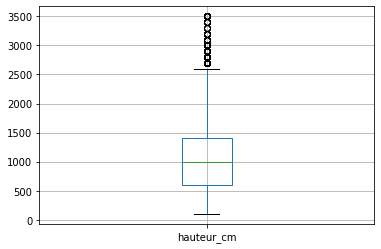

In [10]:
new_df.boxplot(column=['hauteur_cm'])


<AxesSubplot:>

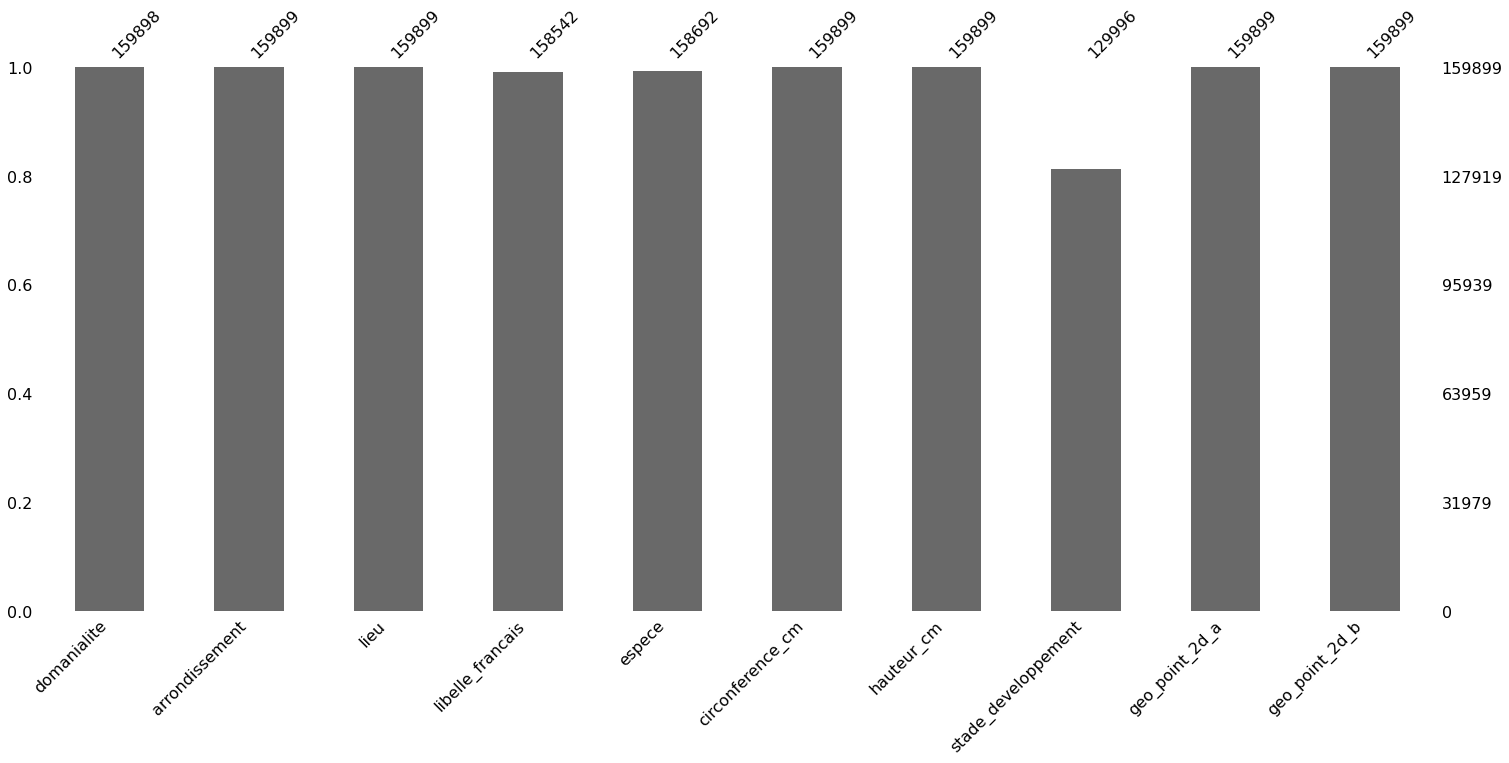

In [11]:
import missingno as msno

msno.bar(new_df)

In [12]:
import seaborn as sns


In [13]:
n_tree = [1 for i in range(len(new_df))]
new_df["n_tree"] = n_tree



In [14]:
new_df["arrondissement"].replace({"PARIS 10E ARRDT":"10E ARR","PARIS 11E ARRDT":"11E ARR","PARIS 12E ARRDT":"12E ARR",
                                  "PARIS 13E ARRDT":"13E ARR","PARIS 14E ARRDT":"14E ARR","PARIS 15E ARRDT":"15E ARR",
                                  "PARIS 16E ARRDT":"16E ARR","PARIS 17E ARRDT":"17E ARR","PARIS 18E ARRDT":"18E ARR",
                                  "PARIS 19E ARRDT":"19E ARR","PARIS 1ER ARRDT":"1ER ARR","PARIS 20E ARRDT":"20E ARR",
                                  "PARIS 2E ARRDT":"2E ARR","PARIS 3E ARRDT":"3E ARR","PARIS 4E ARRDT":"4E ARR",
                                  "PARIS 5E ARRDT":"5E ARR","PARIS 6E ARRDT":"6E ARR","PARIS 7E ARRDT":"7E ARR",
                                  "PARIS 8E ARRDT":"8E ARR","PARIS 9E ARRDT":"9E ARR","SEINE-SAINT-DENIS":"S.S.DENIS",
                                  "VAL-DE-MARNE":"V.MARNE","BOIS DE BOULOGNE":"B. BOULOGNE","BOIS DE VINCENNES":"B.VINCENNES",
                                  "HAUTS-DE-SEINE":"H.SEINE"}, inplace = True)


In [15]:
new_df_2 = new_df.groupby("arrondissement").sum()
new_df_2.drop("circonference_cm",axis =1, inplace = True)
new_df_2.drop("hauteur_cm",axis =1, inplace = True)
new_df_2.drop("geo_point_2d_a",axis =1, inplace = True)
new_df_2.drop("geo_point_2d_b",axis =1, inplace = True)



Text(0.5, 1.0, " Nombre d'arbres par arroundissement")

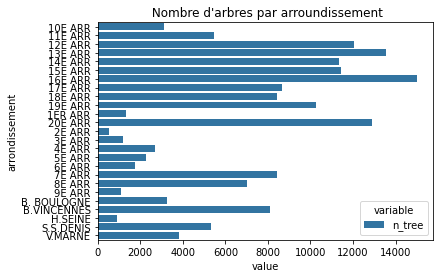

In [16]:
for_sns = pd.melt(new_df_2.reset_index(),id_vars=['arrondissement'],value_vars=new_df_2.columns)
p = sns.barplot(y="arrondissement",x="value", data = for_sns,hue = "variable")
p.set_title(" Nombre d'arbres par arroundissement")

In [17]:
selected_col = new_df[["arrondissement","circonference_cm","hauteur_cm"]]
new_df_3 = selected_col.copy()

In [18]:
ndf_3 = new_df_3.groupby("arrondissement").sum()

In [19]:
for_sns_2 = ndf_3.reset_index()

Text(0.5, 1.0, 'hauteur_cm et circonference_cm par arrondissement')

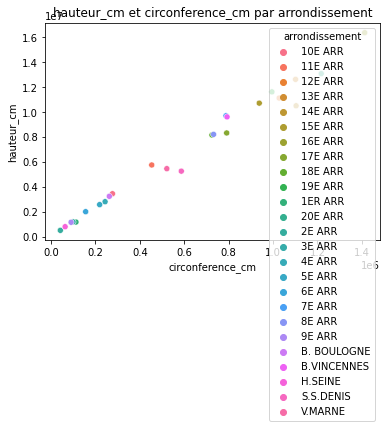

In [20]:
g = sns.scatterplot(data = for_sns_2,x = "circonference_cm",y = "hauteur_cm",hue = "arrondissement")
g.set_title("hauteur_cm et circonference_cm par arrondissement")

In [21]:
selected_col_2 = new_df[["stade_developpement","hauteur_cm"]]
new_df_4 = selected_col_2.copy()

In [22]:
ndf_4 = new_df_4.groupby("stade_developpement").sum()


In [23]:
for_sns_3 = ndf_4.reset_index()

Text(0.5, 1.0, 'Hauteur_cm par stade de developpement')

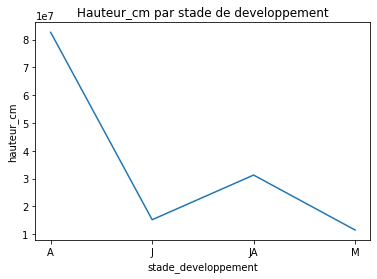

In [24]:
gr = sns.lineplot(data = for_sns_3, x ="stade_developpement", y= "hauteur_cm")
gr.set_title("Hauteur_cm par stade de developpement")